# **라이브러리 설치 및 데이터 로드**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
!gdown --id 10c1ZSlqI-3GlWeAQ9-sJcAtqMPRKCix5

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10c1ZSlqI-3GlWeAQ9-sJcAtqMPRKCix5
To: /content/국민건강보험공단_건강검진정보_20211229.csv
100% 98.9M/98.9M [00:01<00:00, 61.5MB/s]


# **데이터 분석**

In [ ]:
df = pd.read_csv('/content/국민건강보험공단_건강검진정보_20211229.csv', encoding = 'cp949')
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


총 100만명에 대한 검진 내역과 31개의 독립변수로 구성됩니다. 

In [ ]:
df.shape

(1000000, 31)

In [ ]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

대부분의 종속 변수가 연속형 변수임을 알 수 있습니다.

"국민건강정보데이터 건강검진정보 사용자 매뉴얼"에 의하면, '흡연상태', '음주여부' 등과 같은 명목형 변수, '요단백'과 같은 순서형 변수 또한 존재합니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

결측치가 존재합니다. 

In [ ]:
df.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

결측치를 처리하기 전, 종속 변수(혈압상태)에 유의미한 영향을 미치는 변수를 탐색합니다.

범주형 변수와 연속형 변수 간의 관계는 다음 방법을 통해 파악할 수 있습니다.

    1) 종속 변수('혈압상태')에 따른 각 독립변수의 평균값
    2) boxplot의 분포


먼저, 종속 변수(혈압상태)를 생성합니다.

In [ ]:
df['혈압상태'] = np.where((df['이완기 혈압'] < 80) & (df['수축기 혈압'] < 120), '안정혈압상태', 
                      np.where((df['이완기 혈압'] >= 90) | (df['수축기 혈압'] >= 130), '고혈압상태', 
                               '불안정혈압상태'))

범주형 변수인 '혈압상태'를 숫자형으로 변환하는 레이블 인코딩을 수행합니다.

    고혈압상태 : 0
    불안정혈압상태 : 1
    안정혈압상태 : 2

In [ ]:
le = LabelEncoder()
df['혈압상태'] = le.fit_transform(df['혈압상태'])
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자,혈압상태
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29,1
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29,2
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29,1
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29,0
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29,0


혈압상태 변수에 따른 각 독립변수의 평균값은 다음과 같습니다. 

만약 특정 독립변수의 평균값의 차이가 크다면 그 변수는 종속 변수에 유의미한 영향을 주는 것을 의미합니다. 

평균값 확인 결과, 전반적으로 '혈압상태'에 따른 평균값 차이의 정도는 유사합니다.

In [ ]:
df.groupby('혈압상태').apply(np.mean).T

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


혈압상태,0,1,2
기준년도,2020.000000,2020.000000,2020.000000
가입자 일련번호,500612.810995,499403.893097,499796.276036
시도코드,34.309525,34.091231,33.707894
성별코드,1.431317,1.463495,1.578272
연령대 코드(5세단위),12.415311,11.874574,11.378346
신장(5Cm단위),160.994827,161.403302,160.557064
체중(5Kg 단위),65.435229,63.640644,59.821955
허리둘레,85.010929,82.719793,78.978302
시력(좌),0.912297,0.940383,0.950859
시력(우),0.914892,0.943942,0.950823


상자그림을 통해 종속 변수에 따른 독립 변수의 분포를 알 수도 있습니다.

<AxesSubplot:xlabel='혈압상태', ylabel='체중(5Kg 단위)'>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, 

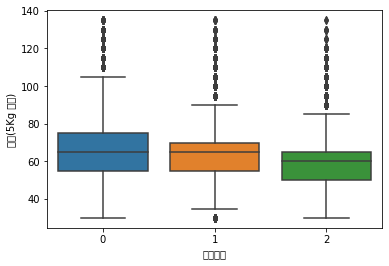

In [ ]:
sns.boxplot(x = '혈압상태', y = '체중(5Kg 단위)', data = df)

기준년도, 가입자 일련번호, 시도코드, 데이터 공개일자와 같은 변수들은 예측에 도움이 되지 않으므로 제외합니다. 

1차로 사용 독립 변수를 선택한 뒤, 결측치 비율을 확인합니다.

In [ ]:
df = df[['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '식전혈당(공복혈당)',
       '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백', '이완기 혈압', '수축기 혈압',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '치아우식증유무', '치석', '혈압상태']]

df.isnull().sum() / len(df)*100 

성별코드             0.0000
연령대 코드(5세단위)     0.0000
신장(5Cm단위)        0.0000
체중(5Kg 단위)       0.0000
허리둘레             0.0108
시력(좌)            0.0257
시력(우)            0.0252
청력(좌)            0.0222
청력(우)            0.0230
식전혈당(공복혈당)       0.7602
총 콜레스테롤         59.7694
트리글리세라이드        59.7678
HDL 콜레스테롤       59.7685
LDL 콜레스테롤       60.5529
혈색소              0.7611
요단백              1.2141
이완기 혈압           0.7534
수축기 혈압           0.7532
혈청크레아티닌          0.7602
(혈청지오티)AST       0.7601
(혈청지오티)ALT       0.7602
감마 지티피           0.7603
흡연상태             0.0343
음주여부             0.0196
구강검진 수검여부        0.0000
치아우식증유무         66.8617
치석              66.8618
혈압상태             0.0000
dtype: float64

결측치가 상대적으로 큰 비중을 차지하는 변수는 **총 콜레스테롤, HDL 콜레스테롤, LDL 콜레스테롤,  트리글리세라이드, 치아우식증유무, 치석** 변수입니다.

아래의 **민감도 분석** 수행 결과, 변수 중요도가 그리 높지 않다고 판단했습니다. 

변수 중요도가 높지 않고, 결측치 비율이 큰 변수들은 제외합니다.

### **민감도 분석**
특정 변수의 중요도를 판단할 때, 실험에서 해당 변수의 유무에 따라 달라지는 결과로 변수 중요도를 판단함.
- 결과에 차이가 크다면, 변수 중요도는 높을 것이고, 
- 결과에 차이가 미미하다면, 변수 중요도는 낮음.

In [ ]:
## 트리글리세라이드 변수 "포함" 

df_with_tri = df[['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '식전혈당(공복혈당)',
       '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '치아우식증유무', '치석', '혈압상태']]

In [ ]:
## 트리글리세라이드 변수 "미포함"

df_without_tri = df[['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '식전혈당(공복혈당)',
       '총 콜레스테롤', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '치아우식증유무', '치석', '혈압상태']]

In [ ]:
## 결측치 제거

df_without_tri = df_without_tri.dropna()
df_without_tri = df_without_tri.reset_index(drop = True)

In [ ]:
## Train data

x_data = df_without_tri[['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '식전혈당(공복혈당)',
       '총 콜레스테롤', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '치아우식증유무', '치석']]
y_data = df_without_tri[['혈압상태']]

In [ ]:
## Train & Test 분리

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify = y_data)

In [ ]:
## 스케일링 - 연속형 변수

scaler = StandardScaler()
cols_n = ['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '식전혈당(공복혈당)',
       '총 콜레스테롤', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피']
scaler.fit(x_train[cols_n])
x_train[cols_n] = scaler.transform(x_train[cols_n])
x_test[cols_n] = scaler.transform(x_test[cols_n])

In [ ]:
## 모델 정의

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 128, activation = 'relu'), 
    tf.keras.layers.Dropout(rate = 0.2), 
    tf.keras.layers.Dense(units = 64, activation = 'relu'), 
    tf.keras.layers.Dense(units = 3, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
x_train.shape, y_train.shape

((100430, 24), (100430, 1))

In [ ]:
early_stopping = EarlyStopping(
                    monitor='val_accuracy', 
                    patience=5, 
                    verbose=1, 
                    mode='auto', 
                    restore_best_weights=True
)

In [ ]:
## 모델 학습

history = model.fit(x_train, y_train.iloc[:,-1], 
                    validation_data = (x_test, y_test), 
                    batch_size = 50, epochs = 50,
                    callbacks = [early_stopping])

Epoch 1/50
2009/2009 [==============================] - 8s 4ms/step - loss: 1.0303 - accuracy: 0.4836 - val_loss: 1.0097 - val_accuracy: 0.4968
Epoch 2/50
2009/2009 [==============================] - 8s 4ms/step - loss: 1.0123 - accuracy: 0.4973 - val_loss: 1.0090 - val_accuracy: 0.4982
Epoch 3/50
2009/2009 [==============================] - 9s 5ms/step - loss: 1.0090 - accuracy: 0.4989 - val_loss: 1.0098 - val_accuracy: 0.4966
Epoch 4/50
2009/2009 [==============================] - 13s 6ms/step - loss: 1.0081 - accuracy: 0.4992 - val_loss: 1.0125 - val_accuracy: 0.4914
Epoch 5/50
2009/2009 [==============================] - 11s 5ms/step - loss: 1.0074 - accuracy: 0.4998 - val_loss: 1.0071 - val_accuracy: 0.5000
Epoch 6/50
2009/2009 [==============================] - 8s 4ms/step - loss: 1.0066 - accuracy: 0.5008 - val_loss: 1.0084 - val_accuracy: 0.4978
Epoch 7/50
2009/2009 [==============================] - 12s 6ms/step - loss: 1.0059 - accuracy: 0.5014 - val_loss: 1.0076 - val_accura

In [ ]:
model.evaluate(x_test, y_test)

785/785 [==============================] - 2s 2ms/step - loss: 1.0082 - accuracy: 0.5004


[1.008155107498169, 0.5003584623336792]

In [ ]:
y_predict = model.predict(x_test)

785/785 [==============================] - 2s 2ms/step


In [ ]:
## 트리글리세라이드 "포함" 및 "미포함" 예측값 출력

pred = []
for i in range(len(x_test)):
    pred.append(np.argmax(y_predict[i]))

pred

[2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,


In [ ]:
without_tri = pd.DataFrame({'answer': y_test['혈압상태'] , 'y_pred' : pred})
without_tri.to_csv('without_tri.csv', index = False)

In [ ]:
tri = pd.read_csv('/content/with_tri.csv')
tri.rename(columns = {'y_pred':'tri'}, inplace = True)

In [ ]:
no_tri = pd.read_csv('/content/without_tri.csv')
no_tri.rename(columns = {'y_pred':'no_tri'}, inplace = True)

In [ ]:
## 트리글리세라이드 유무에 따른 혈압상태 결과 비교 

compare = pd.concat([tri['tri'], no_tri['no_tri']], axis = 1)
compare

,tri,no_tri
0,2,2
1,0,0
2,0,0
3,2,2
4,2,2
...,...,...
25103,0,0
25104,2,2
25105,2,2
25106,0,2


In [ ]:
## 결과 일치율 

sum(compare['tri'] == compare['no_tri']) / len(tri)

## 트리글리세라이드 변수 유무에 따라 혈압상태 결과에 큰 차이가 없다는 것을 알 수 있습니다.

0.9387446232276565

# .

변수 중요도와 결측치 비율을 고려한 후의 결과는 다음과 같습니다. 

In [ ]:
df = df[['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '식전혈당(공복혈당)', 
       '이완기 혈압', '수축기 혈압', '혈색소', '요단백','혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', 
       '감마 지티피', '흡연상태', '음주여부', '구강검진 수검여부', '혈압상태']]

결측치 처리로 평균 대치와 제거를 수행한 결과, 결측치가 존재하는 행을 제거했을 때, 성능이 더 높았습니다.

따라서, 아래 변수들도 결측값이 존재하는 행에 대해 제거합니다.

In [ ]:
## 결측치 비율 (%)

df.isnull().sum() / len(df)*100 

성별코드            0.0000
연령대 코드(5세단위)    0.0000
신장(5Cm단위)       0.0000
체중(5Kg 단위)      0.0000
허리둘레            0.0108
시력(좌)           0.0257
시력(우)           0.0252
청력(좌)           0.0222
청력(우)           0.0230
식전혈당(공복혈당)      0.7602
이완기 혈압          0.7534
수축기 혈압          0.7532
혈색소             0.7611
요단백             1.2141
혈청크레아티닌         0.7602
(혈청지오티)AST      0.7601
(혈청지오티)ALT      0.7602
감마 지티피          0.7603
흡연상태            0.0343
음주여부            0.0196
구강검진 수검여부       0.0000
혈압상태            0.0000
dtype: float64

In [ ]:
df = df.dropna()
df = df.reset_index(drop = True)
df.isna().sum()

성별코드            0
연령대 코드(5세단위)    0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
식전혈당(공복혈당)      0
이완기 혈압          0
수축기 혈압          0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마 지티피          0
흡연상태            0
음주여부            0
구강검진 수검여부       0
혈압상태            0
dtype: int64

숫자형 변수들에 대한 통계량을 확인한 결과, 허리둘레, 식전혈당(공복혈당) 등의 변수들에 이상치가 존재하는 것을 알 수 있습니다. 

그렇다고해서 이상치를 무조건 제거한다면, 데이터의 수가 크게 줄어들 뿐만 아니라 실제 이상값에 대한 학습을 못하는 결과를 불러올 수 있습니다. 

따라서, 상대적으로 영향력이 큰 변수인 허리둘레의 이상치만 제거하겠습니다.

In [ ]:
df.describe()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),식전혈당(공복혈당),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,혈압상태
count,986916.00000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,...,986916.00000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000,986916.000000
mean,1.48773,11.887495,161.033143,63.124552,82.345174,0.934165,0.935946,1.044934,1.042662,104.248898,...,14.21323,1.122228,0.849621,27.703775,26.775634,37.793010,1.559510,0.588252,0.334169,0.946881
std,0.49985,2.150052,9.174254,12.265546,9.615321,0.625748,0.632467,0.214621,0.209117,25.376439,...,1.55166,0.493271,0.340115,25.302810,25.847579,51.814152,0.784457,0.492150,0.471699,0.849081
min,1.00000,9.000000,130.000000,30.000000,5.800000,0.100000,0.100000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.00000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,91.000000,...,13.20000,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.000000
50%,1.00000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,99.000000,...,14.20000,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,1.000000
75%,2.00000,13.000000,170.000000,70.000000,89.000000,1.200000,1.200000,1.000000,1.000000,109.000000,...,15.30000,1.000000,1.000000,30.000000,31.000000,40.000000,2.000000,1.000000,1.000000,2.000000
max,2.00000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,950.000000,...,25.00000,6.000000,95.000000,8712.000000,5990.000000,2630.000000,3.000000,1.000000,1.000000,2.000000


In [ ]:
## 이상치 제거 함수 

def remove_outliers(feature):
    q1=df[feature].quantile(0.25)
    q2=df[feature].quantile(0.5)
    q3=df[feature].quantile(0.75)
    iqr = q3 - q1

    condition = (df[feature] > q3 + 1.5*iqr) | (df[feature] < q1 - 1.5*iqr)
    outlier = df[condition].index
    df.drop(outlier, inplace=True)

remove_outliers('허리둘레')

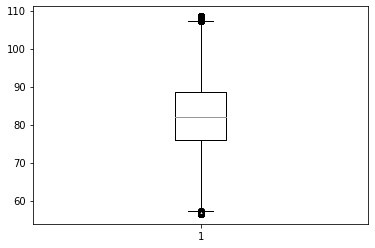

In [ ]:
%matplotlib inline
plt.boxplot(df['허리둘레'])
plt.show()

또한, 시력(좌/우) 변수는 범위가 0.1 ~ 2.5이고, 실명은 9.9로 표기되어있습니다. 

이 변수는 숫자의 크기가 예측에 영향을 주는 연속형 변수이므로 실명 항목을 0.0으로 변경해주었습니다.

In [ ]:
df = df.replace({'시력(좌)' : 9.9}, 0.0)
df = df.replace({'시력(우)' : 9.9}, 0.0)

In [ ]:
df[['시력(좌)']].describe()

,시력(좌)
count,980133.000000
mean,0.899028
std,0.328841
min,0.000000
25%,0.700000
50%,0.900000
75%,1.200000
max,2.500000


분류에 사용할 변수

    <독립변수>

    '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', 
    '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '식전혈당(공복혈당)', '혈색소', 
    '요단백','혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', 
    '흡연상태', '음주여부', '구강검진 수검여부'
    
    <종속변수>
    '혈압상태'

이로써, 탐색적 데이터 분석, 변수 선택, 결측치 처리, 이상치 처리, 데이터 정제 등의 전처리를 완료했습니다.






해당 과제는 연속형 및 명목형 독립변수들을 통해 혈압상태(고혈압상태, 불안정상태혈압, 안정상태혈압)을 분류하는 다중 클래스 분류 문제입니다.

따라서, 입력층, 은닉층, 출력층으로 복잡한 비선형 관계를 풀 수 있는 심층 신경망 및 분류 머신러닝 모델을 사용할 수 있습니다.